In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

In [2]:
%matplotlib notebook
plt.rc('font', size=15)

In [3]:
def commNetGenTower(total_area):
    """
    Generates a random tower.
    
    Inputs:
    total_area: a tuple of 2 integers, (total_width, total_height).

    Outputs:
    new_tower: a tuple of 4 integers, (left_up_x, left_up_y, width, height)
    """
    total_width, total_height = total_area
    left_up_x = np.random.randint(0, total_width)
    left_up_y = np.random.randint(0, total_height)
    width = np.random.randint(1, total_width-left_up_x+1)
    height = np.random.randint(1, total_height-left_up_y+1)
    new_tower = (left_up_x, left_up_y, width, height)
    
    return new_tower

In [16]:
def commNetDraw(new_towers, total_area):
     
    """
    This component is for printing a colorful map of trimmed towers given a sequence of trimmed tower areas.
    
    Inputs:
         1. trimmed_towers: A list of tuples of 4 integers(left_up_x, left_up_y, length, height), representing trimmed tower areas.
         2. total_area: a tuple of 2 integers, (total_length, total_height).
    Output:
         net_patches: A matplotlib figure with different colors representing areas covered by different towers.
         (Optional): A animation, that the plotting pauses once a new tower area is plotted.
    """
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.set_aspect('equal')

    max_width, max_height = total_area
    ax.set_xlim(0, max_width)
    ax.set_ylim(0, max_height)
    colors = ['r', 'g', 'b', 'c', 'y']
    c = 0

    fig.canvas.draw()

    for new_tower in new_towers:
        (left_up_x, left_up_y, width, height) = new_tower
        p = patches.Rectangle((left_up_x, left_up_y), width, height, alpha = 0.5, color=colors[c])    
        c += 1
        if c == len(colors):
            c = 0
        ax.add_patch(p)
        fig.canvas.draw()
        time.sleep(0.5)


In [ ]:
total_area = (15, 10)
max_width, max_height = total_area

In [ ]:
new_tower = commNetGenTower(total_area)
(left_up_x, left_up_y, width, height) = new_tower
old_map = np.zeros(total_area)
new_map = np.copy(old_map)
new_map[left_up_x : left_up_x+width, left_up_y : left_up_y+height] += 1 

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.set_aspect('equal')
ax.imshow(new_map.T, origin='lower')

In [21]:
total_area = (15, 10)

In [22]:
new_towers = []
for i in range(5):
    new_towers.append(commNetGenTower(total_area))

<IPython.core.display.Javascript object>


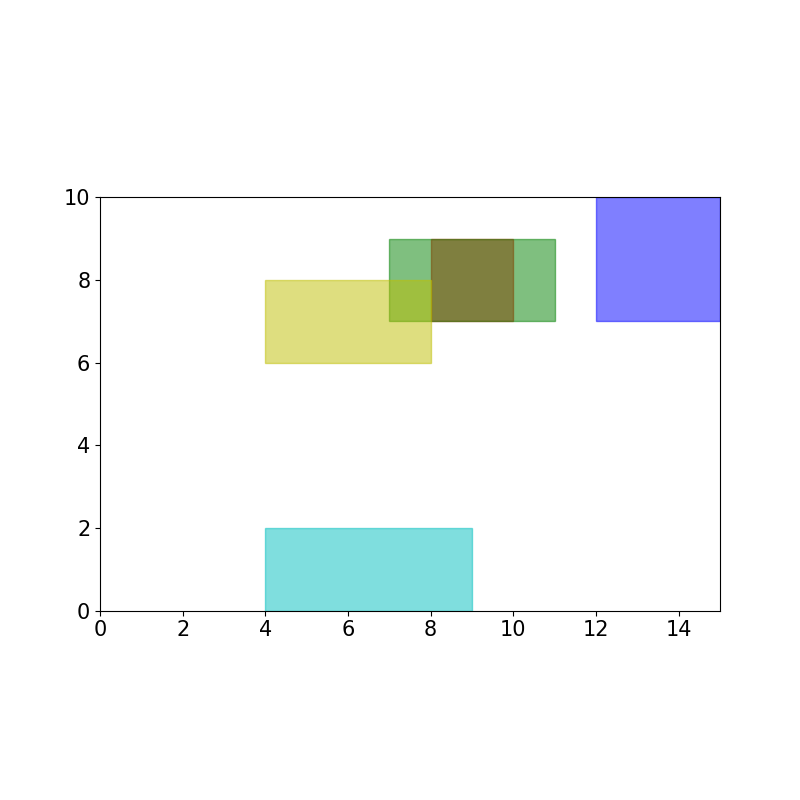

In [23]:
commNetDraw(new_towers, total_area)